In [1]:
%matplotlib inline

In [2]:
import mcaa
import random as rng
import matplotlib.pyplot as plt
import numpy as np

In [3]:
plt.rcParams["figure.figsize"] = (16, 5)

In [39]:
# Constants
BETA = 0.5
ALPHA =  5.0
N = 20
M = int(ALPHA * N) 
T = 10000 * N
MEASURE_STEP = 1
RUN_COUNT = 64
THREAD_COUNT = 4

In [40]:
# SEEDS
weightsSeed = rng.randint(0,2**32-1)
patternsSeed = rng.randint(0,2**32-1)

samplerSeeds = [rng.randint(0,2**32-1) for i in range(RUN_COUNT)]
runnerSeeds = [rng.randint(0,2**32-1) for i in range(RUN_COUNT)]

In [41]:
# Input variables
weights = mcaa.buildRandomWeights(N, weightsSeed)
patterns = mcaa.buildRandomPatterns(N, M, patternsSeed)
classes = mcaa.buildClasses(weights, patterns)

In [42]:
# SAMPLERS & RUNNERS
samplers = [mcaa.sampler(N, samplerSeeds[i]) for i in range(RUN_COUNT)]
runners = [mcaa.MCMCRunner(T, MEASURE_STEP, BETA, samplers[i], weights, patterns, classes, runnerSeeds[i]) \
           for i in range(RUN_COUNT)]
multiRunner = mcaa.multiMCMCRunner(THREAD_COUNT, [runner.getPointer() for runner in runners]) 

In [43]:
# RUN
multiRunner.runAll()

In [44]:
# Outputs
allEMeasures = multiRunner.getEMeasures()
allOverlapMeasures = multiRunner.getOverlapMeasures()

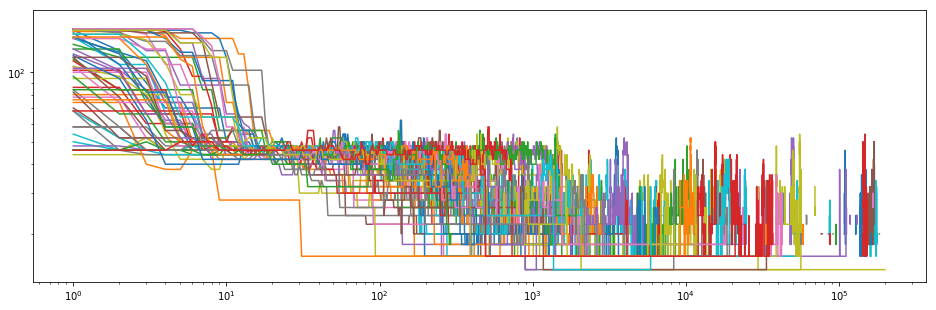

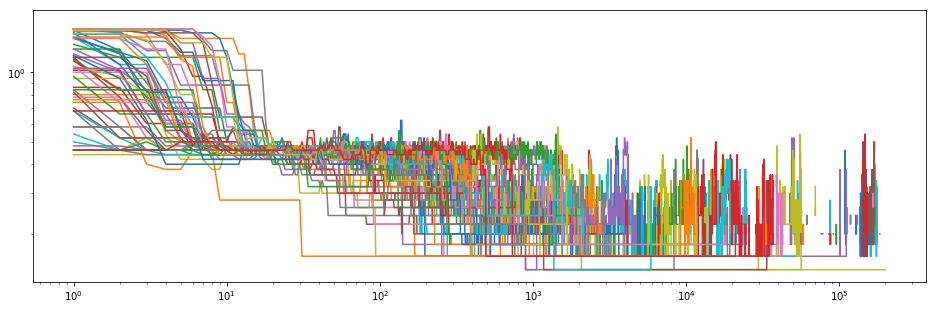

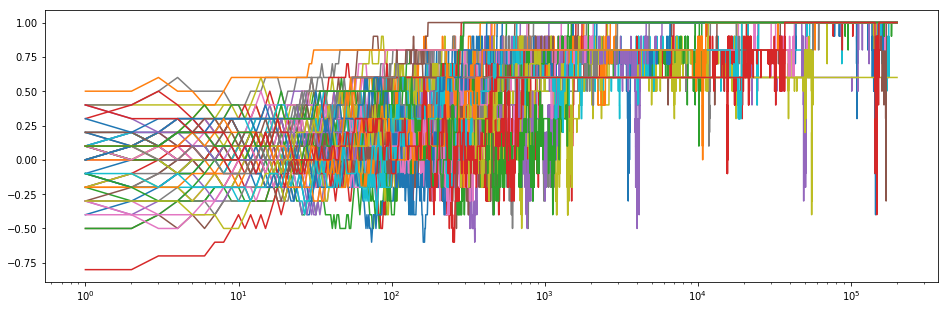

In [48]:
# Plot
for i in range(RUN_COUNT):
    EMeasures = allEMeasures[:, i];
    plt.plot(EMeasures)
plt.xscale('log')
plt.yscale('log')
plt.show()

for i in range(RUN_COUNT):
    EMeasures = allEMeasures[:, i];
    plt.plot(EMeasures / M)
plt.xscale('log')
plt.yscale('log')
plt.show()


for i in range(RUN_COUNT):
    overlapMeasures = allOverlapMeasures[:, i];
    plt.plot(overlapMeasures)
plt.xscale('log')
plt.show()